 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [196]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [204]:
# Use the Pathlib libary to set the path to the Whale CSV
whale_data = Path("Resources/whale_returns.csv")

In [217]:
# Reading whale returns
#whale  = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
#whale.dtypes

whale = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [218]:
# Count nulls
whale.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02  

In [206]:
# Drop nulls
whale = whale.dropna().copy
whale

<bound method NDFrame.copy of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496     

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [219]:
# Use the Pathlib libary to set the path to the Algo CSV
algo_data = Path("Resources/algo_returns.csv")

In [208]:
# Reading algo returns
algo = pd.read_csv(algo_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [220]:
# Count nulls
algo.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [104]:
# Drop nulls
algo = algo.dropna().copy
algo

<bound method NDFrame.copy of               Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]>

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [221]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path("Resources/sp_tsx_history.csv")
sp_tsx = pd.read_csv(sp_tsx_data, index_col="Date",infer_datetime_format=True, parse_dates=True)

In [222]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [223]:
# Fix Data Types
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$","").str.replace(",","")

sp_tsx["Close"] = sp_tsx["Close"].astype("float")

/var/folders/yg/hggpn4ln1fz_jsm60d2pkthh0000gp/T/ipykernel_78205/2879867687.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx["Close"] = sp_tsx["Close"].str.replace("$","").str.replace(",","")


In [224]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx.pct_change()
sp_tsx_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [113]:
sp_tsx_returns.tail()

,SP TSX Close
Date,
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003
2019-12-27,-0.000695
2019-12-30,-0.004057


In [225]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna().copy
sp_tsx_returns

<bound method NDFrame.copy of                Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709
...              ...
2019-12-20  0.003188
2019-12-23  0.000600
2019-12-24  0.003003
2019-12-27 -0.000695
2019-12-30 -0.004057

[1817 rows x 1 columns]>

In [226]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx.columns = ["SP TSX Close"]
sp_tsx.head()


,SP TSX Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [227]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale, algo, sp_tsx], axis="columns", join="inner") 

combined_df.sort_index(inplace=True)

combined_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,15264.05
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

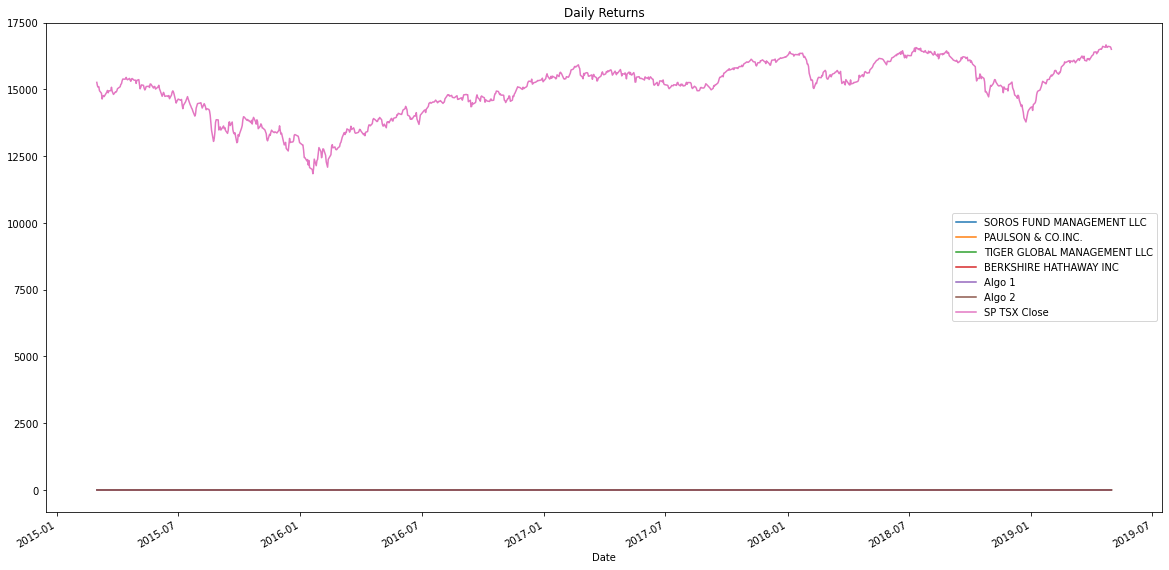

In [132]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Risk'}>

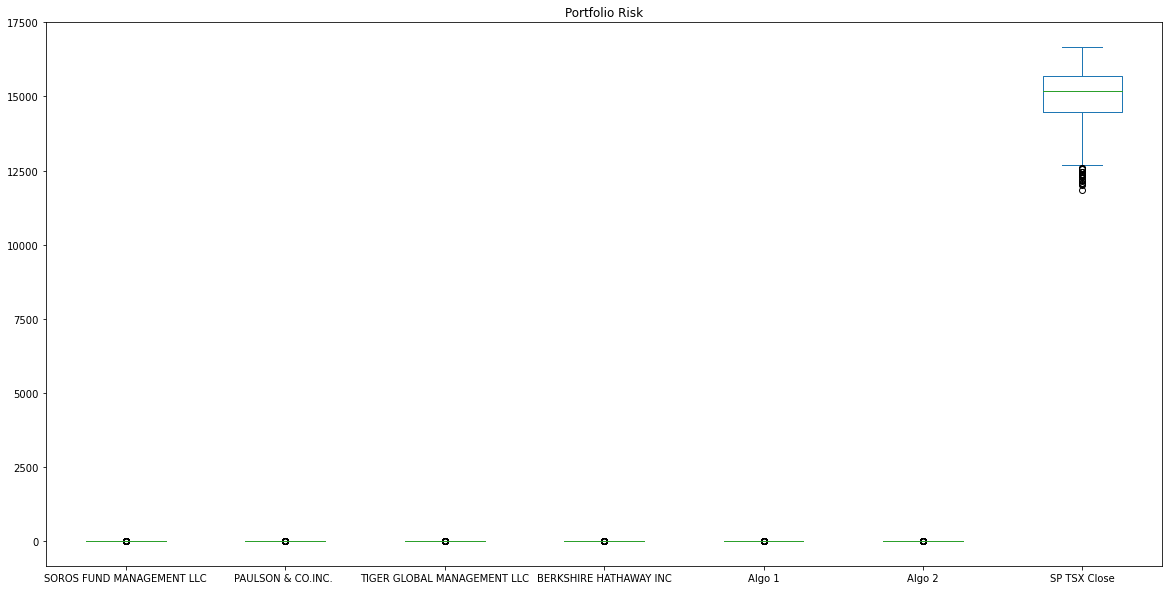

In [136]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
combined_df.plot.box(figsize=(20, 10),title="Portfolio Risk")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

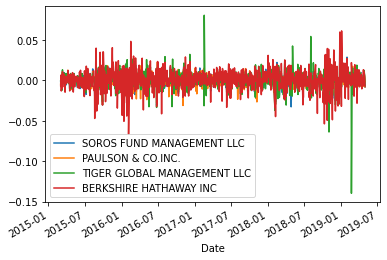

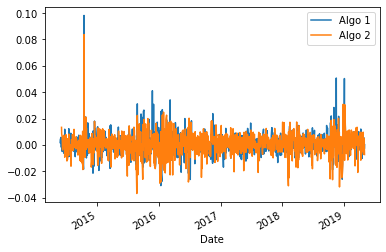

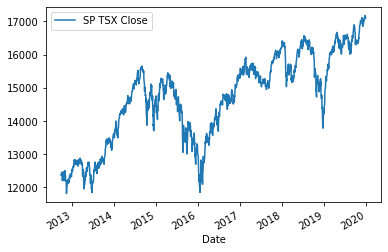

In [646]:
# Box plot to visually show risk
whale.plot()
algo.plot()
sp_tsx.plot()

### Calculate Standard Deviations

In [228]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC         0.007828
PAULSON & CO.INC.                 0.006982
TIGER GLOBAL MANAGEMENT LLC       0.010883
BERKSHIRE HATHAWAY INC            0.012826
Algo 1                            0.007590
Algo 2                            0.008323
SP TSX Close                   1016.217410
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [229]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_return = combined_df.pct_change()
daily_std = daily_return.std()
daily_std.head()
# Determine which portfolios are riskier than the S&P TSX 60

riskier = combined_df.std().sort_values()
riskier

PAULSON & CO.INC.                 0.006982
Algo 1                            0.007590
SOROS FUND MANAGEMENT LLC         0.007828
Algo 2                            0.008323
TIGER GLOBAL MANAGEMENT LLC       0.010883
BERKSHIRE HATHAWAY INC            0.012826
SP TSX Close                   1016.217410
dtype: float64

### Calculate the Annualized Standard Deviation

In [230]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                         253.796326
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

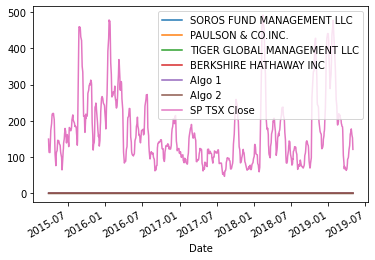

In [231]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.plot()

### Calculate and plot the correlation

<AxesSubplot:>

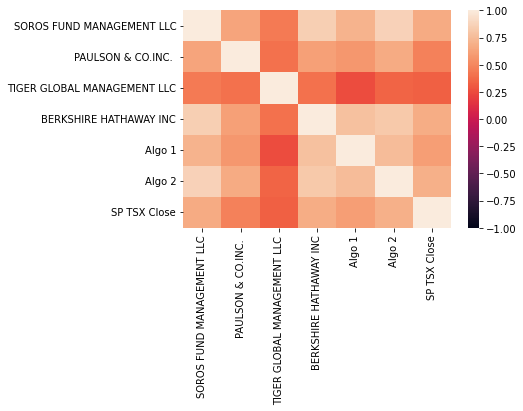

In [232]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

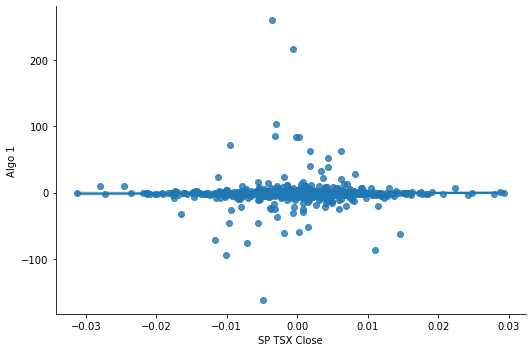

In [233]:
# Calculate covariance of a single portfolio
covariance_algo_1 = daily_return['Algo 1'].cov(daily_return['SP TSX Close'])
# Calculate variance of S&P TSX
variance = daily_return['SP TSX Close'].var()
#Computing beta
beta = covariance_algo_1/variance
# Plot beta trend
sns.lmplot(x='SP TSX Close', y='Algo 1', data=daily_return, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [867]:
# Use `ewm` to calculate the rolling window
times = ['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06']
ewm = combined_df.ewm(halflife='21 days', times=combined_df.DatetimeIndex(times)).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [234]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:>

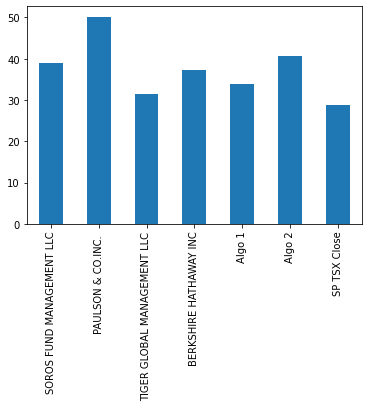

In [235]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here! overtime Algo 2 outperperforms SP TSX and Whales portofolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [238]:
# Reading data from 1st stock
L_data = Path("Resources/l_historical.csv")
L = pd.read_csv(L_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
L.dtypes

Symbol     object
Close     float64
dtype: object

In [239]:
# Reading data from 2nd stock
otex_data = Path("Resources/otex_historical.csv")
otex = pd.read_csv(otex_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
otex.dtypes

Symbol     object
Close     float64
dtype: object

In [240]:
# Reading data from 3rd stock
shop_data = Path("Resources/shop_historical.csv")
shop = pd.read_csv(shop_data, index_col="Date",infer_datetime_format=True, parse_dates=True)

shop.dtypes

Symbol     object
Close     float64
dtype: object

In [241]:
# Combine all stocks in a single DataFrame
historical_df = pd.concat([L, otex, shop], axis="columns", join="inner") 

historical_df.sort_index(inplace=True)

historical_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [242]:
# Reset Date index
historical_df.reset_index(inplace=True)

In [243]:
# Reorganize portfolio data by having a column per symbol
historical_df

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
1,2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2,2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
3,2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
4,2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...,...
496,2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
497,2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
498,2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39
499,2019-12-27,L,67.78,OTEX,57.70,SHOP,534.76


In [249]:
# Calculate daily returns
historical_daily_returns = historical_df['Close'].pct_change()
# Drop NAs
historical_daily_retunrs = historical_daily_returns.dropna().copy()
# Display sample data
historical_daily_returns

,Close,Close,Close
0,NaN,NaN,NaN
1,-0.010002,-0.011703,0.023398
2,0.000174,-0.003715,0.017092
3,0.000000,-0.007924,-0.001455
4,-0.009753,-0.009631,0.016392
...,...,...,...
496,0.003547,0.024441,-0.005503
497,-0.003240,-0.013463,-0.003118
498,-0.000148,-0.007773,0.026915
499,0.001626,0.004526,0.017834


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [250]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portofolio_returns = historical_daily_returns.dot(weights)
# Display sample data
portofolio_returns.head()

0         NaN
1    0.000565
2    0.004517
3   -0.003126
4   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [255]:
# Join your returns DataFrame to the original returns DataFrame
join_df = pd.concat([L,otex,shop, combined_df], axis="columns", join="inner") 
join_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Close
Date,,,,,,,,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06,0.006662,0.005759,0.005930,0.009079,0.005190,0.005368,102.393162
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15,0.006720,0.005645,0.005815,0.009061,0.005001,0.005600,117.638930
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46,0.006630,0.005680,0.006359,0.008851,0.004933,0.005588,132.671522
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26,0.006444,0.005509,0.006101,0.008593,0.004013,0.005686,134.936946
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51,0.006328,0.005492,0.005681,0.008557,0.004011,0.005440,128.017990


In [256]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_df = join_df.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [261]:
# Calculate the annualized `std`
join_daily_returns = join_df['Close'].pct_change()
join_daily_std = join_daily_returns.std()
join_annualized_std = join_daily_std * np.sqrt(252)
join_annualized_std.head()

Close    0.163043
Close    0.225956
Close    0.503772
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

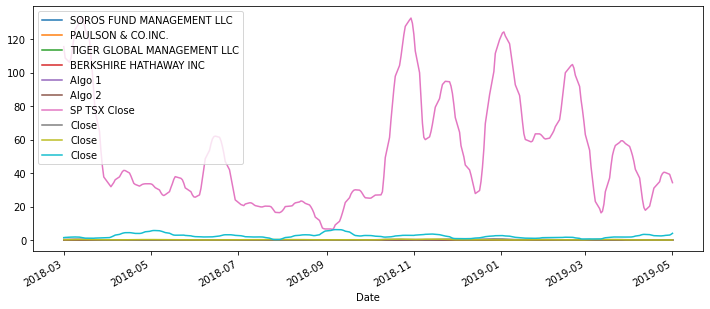

In [852]:
# Calculate rolling standard deviation
join_df = join_df.rolling(window=21).std()
# Plot rolling standard deviation
join_df.plot(figsize=(12,5))

### Calculate and plot the correlation

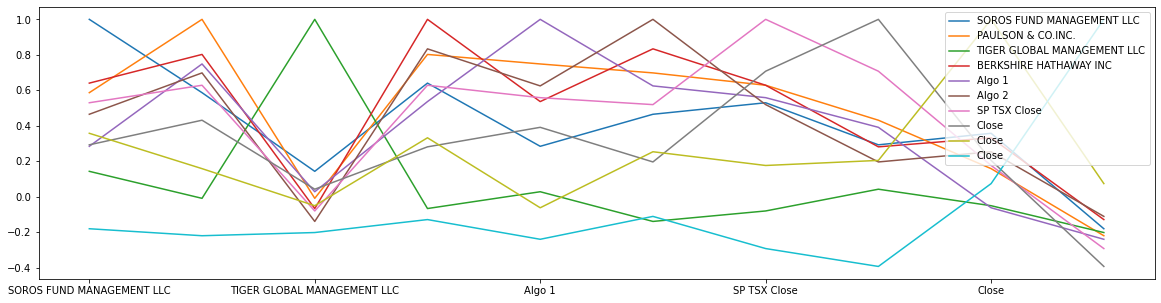

In [853]:
# Calculate and plot the correlation
correlation = join_df.corr().plot(figsize=(20,5))


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Custom Portofolio Returns vs. S&P TSX'}, xlabel='Date'>

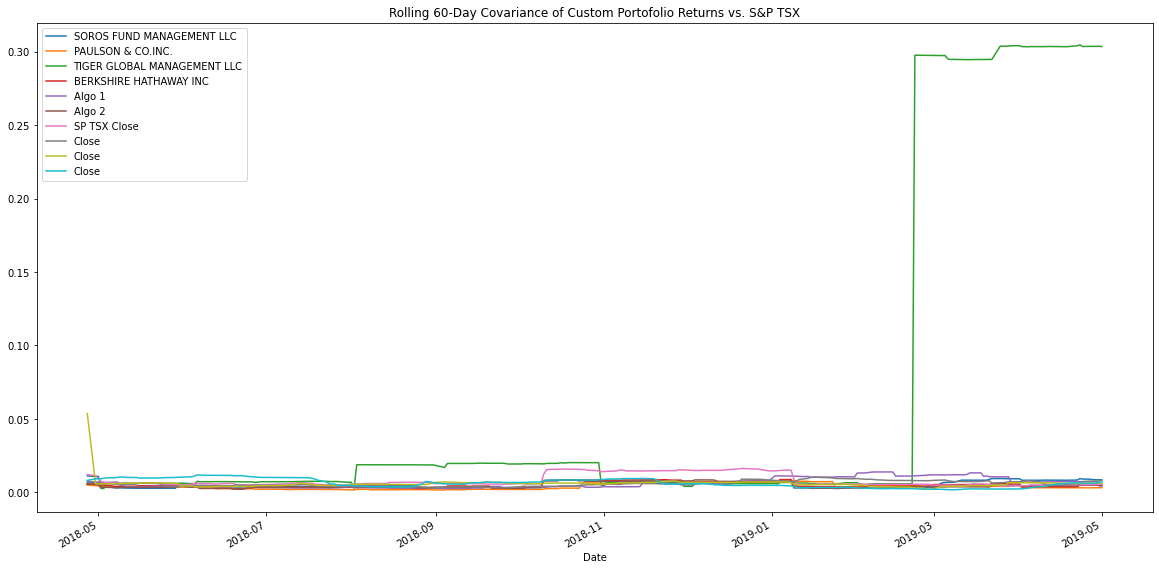

In [854]:
# Calculate and plot Beta
rolling_covariance = join_daily_returns.rolling(window=60).cov(join_daily_returns)
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Custom Portofolio Returns vs. S&P TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [855]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (join_daily_returns.mean() * 252) / (join_daily_returns.std() * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.495183
PAULSON & CO.INC.              0.300287
TIGER GLOBAL MANAGEMENT LLC    0.809999
BERKSHIRE HATHAWAY INC         0.111482
Algo 1                         1.040202
Algo 2                         0.342333
SP TSX Close                   0.677925
Close                          0.603820
Close                          0.570831
Close                          1.204120
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

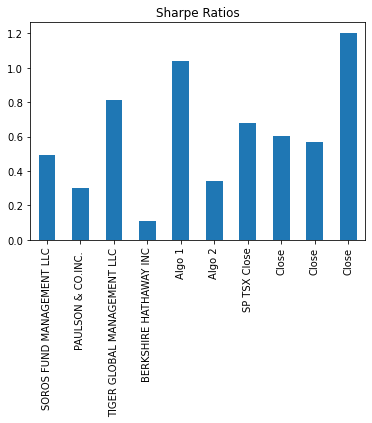

In [856]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
Shop has a ratio higher than 1 it performed better than L and Otex. 